In [1]:
#1 Model Accuracy
#2 Best Model 
#3 Best Parameter 

In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

### Prepare multiple models

In [9]:
models = {"LogisticRegression" : LogisticRegression(),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "SVM" : SVC(),
          "KNeighborsClassifier" : KNeighborsClassifier(),
          "GNB" : GaussianNB(),
          "RandomForestClassifier" : RandomForestClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier()}

### Function for training the multiple models and generating accuracy

In [10]:
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def Model_Accuracy(models, x, y, Scale_Flag):
    xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.2, random_state=0)
    acc_result={}
    for name,model in models.items():
        if(Scale_Flag==1):
            model_pipeline = Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(Scale_Flag==2):
            model_pipeline = Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline = Pipeline([('model',model)])
        #model train and prediction
        model_fit = model_pipeline.fit(x_train,y_train)
        y_pred = model_fit.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name] = acc
    return acc_result

### Function for getting a model with highest accuracy

In [11]:
def Best_Model(model_result):
    high = 0
    for name,acc in model_result.items():
        if acc > high:
            high = acc
            model_name = name
    print("Best model is ",model_name," with Accuracy ",high)

### Function for getting a best models best parameters

In [12]:
def Best_Parameter(model, params, x_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv = GridSearchCV(estimator = model, param_grid = params, cv = cv, scoring = "accuracy")
    res = grid_cv.fit(x_train, y_train)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

### Importing Data to find out suitable model for this classification dataset

In [19]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [22]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [23]:
le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])

df["Sex"]

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int64

In [25]:
x = df.drop(columns = ["Rings"])
y = df["Rings"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
acc = Model_Accuracy(models,x,y,0)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy for  LogisticRegression  is : 0.26913875598086123
The Accuracy for  DecisionTreeClassifier  is : 0.21052631578947367
The Accuracy for  SVM  is : 0.25598086124401914
The Accuracy for  KNeighborsClassifier  is : 0.215311004784689
The Accuracy for  GNB  is : 0.24162679425837322
The Accuracy for  RandomForestClassifier  is : 0.25478468899521534
The Accuracy for  AdaBoostClassifier  is : 0.1937799043062201
The Accuracy for  GradientBoostingClassifier  is : 0.23923444976076555


In [27]:
acc

{'LogisticRegression': 0.26913875598086123,
 'DecisionTreeClassifier': 0.21052631578947367,
 'SVM': 0.25598086124401914,
 'KNeighborsClassifier': 0.215311004784689,
 'GNB': 0.24162679425837322,
 'RandomForestClassifier': 0.25478468899521534,
 'AdaBoostClassifier': 0.1937799043062201,
 'GradientBoostingClassifier': 0.23923444976076555}

In [28]:
Best_Model(acc)

Best model is  LogisticRegression  with Accuracy  0.26913875598086123


In [31]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [67]:
#model = GradientBoostingClassifier()
#params = {"loss":['deviance', 'exponential'],"learning_rate":[0.3,0.1,0.5,0.001,0.01,0.05],"n_estimators":[10,50,100]}
#Best_Parameter(model,params,xtrain,ytrain)

In [ ]:
model = LogisticRegression()
params = {"penalty":['l1', 'l2', 'elasticnet'],"C":[0.3,0.1,0.5,0.001,0.01,0.05]}
Best_Parameter(model, params, x_train, y_train)


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Est

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

### Retraining The model using best parameters

In [69]:
#Retraining The model using best parameters
model = LogisticRegression(algorithm = 'SAMME', learning_rate = 0.3, n_estimators = 100)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

### Evaluation of Best Model on testing Dataset

Accuracy is : 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.86      0.86      0.86        21

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



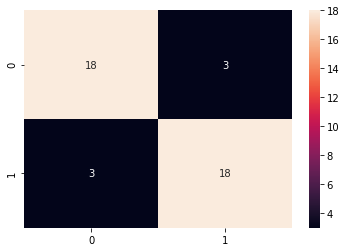

In [70]:
print("Accuracy is :",accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)